# Assignment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('assignment1.csv')

In [3]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [4]:
df.shape

(16834, 16)

In [5]:
df.dtypes

Date                     object
product                  object
phase                    object
campaign_platform        object
campaign_type            object
communication_medium     object
subchannel               object
audience_type            object
creative_type            object
creative_name            object
device                   object
age                      object
spends                  float64
impressions               int64
clicks                    int64
link_clicks             float64
dtype: object

## Data Cleaning

In [6]:
df.isna().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

##### replacing null values with -1

In [7]:
df.fillna(-1,inplace=True)
df.isnull().sum()

Date                    0
product                 0
phase                   0
campaign_platform       0
campaign_type           0
communication_medium    0
subchannel              0
audience_type           0
creative_type           0
creative_name           0
device                  0
age                     0
spends                  0
impressions             0
clicks                  0
link_clicks             0
dtype: int64

###### Ignore rows with 0 impressions

In [8]:
df = df[df['impressions']!=0]
df.shape

(16830, 16)

###### Computing Click Through Rate i.e no. of times ad was clicked divided by impressions

In [9]:
df['click_through_rate'] = df.apply(lambda x: x['clicks']/x['impressions'], axis=1)
df['click_through_rate'].describe()

count    16830.000000
mean         0.184974
std          0.230185
min          0.000000
25%          0.000000
50%          0.125000
75%          0.257109
max          2.000000
Name: click_through_rate, dtype: float64

###### Ignore rows with more than 1 click through rate

In [10]:
df[df['click_through_rate']>1].shape


(26, 17)

###### 26 rows are removed

In [11]:
df = df[df['click_through_rate']<=1]
df.shape

(16804, 17)

In [12]:
df1=df[df['link_clicks'] == -1]
print(df1['campaign_platform'].unique())


['Facebook Ads']


In [13]:
df1.shape

(546, 17)

## Exploratory Data Analysis

In [14]:
df['campaign_platform'].value_counts()

Google Ads      15071
Facebook Ads     1733
Name: campaign_platform, dtype: int64

In [15]:
df['product'].value_counts()

Product 1    16804
Name: product, dtype: int64

In [16]:
df['phase'].value_counts()

Performance    16804
Name: phase, dtype: int64

In [17]:
df.groupby(['campaign_platform', 'campaign_type']).size()

campaign_platform  campaign_type
Facebook Ads       Conversions       1733
Google Ads         Search           15071
dtype: int64

In [18]:
df.groupby(['campaign_platform', 'communication_medium']).size()

campaign_platform  communication_medium
Facebook Ads       Creative                 1733
Google Ads         Search Keywords         15071
dtype: int64

In [19]:
df.groupby(['campaign_platform', 'subchannel']).size()

campaign_platform  subchannel  
Facebook Ads       Facebook Ads    1733
Google Ads         Brand           7829
                   Competitor      2702
                   Generic         4540
dtype: int64

In [20]:
df.groupby(['campaign_platform','device']).size()

campaign_platform  device 
Facebook Ads       device     1733
Google Ads         Desktop    6301
                   Mobile     7346
                   Tablet     1424
dtype: int64

In [21]:
df.groupby(['campaign_platform','age']).size()

campaign_platform  age         
Facebook Ads       25-34            488
                   35-44            485
                   45-54            477
                   55-64            283
Google Ads         18-24           2470
                   25-34           2606
                   35-44           2374
                   45-54           2014
                   55-64           1468
                   65 or more      1554
                   Undetermined    2585
dtype: int64

In [22]:
imprsn_click=(df.groupby('age')['impressions','clicks','spends'].sum()).reset_index()
imprsn_click.columns=['age','impressions','clicks','spends']
imprsn_click=imprsn_click.sort_values('impressions',ascending=False)
print(imprsn_click)


            age  impressions  clicks        spends
1         25-34      3316819  101829  1.122511e+06
2         35-44       885494   32311  3.661006e+05
6  Undetermined       277015   27321  4.149076e+05
3         45-54       203150    8542  9.171300e+04
0         18-24       139914   28220  4.597657e+05
4         55-64        14856    1490  2.081972e+04
5    65 or more        10213    1847  2.616225e+04


In [23]:
CTR_by_age=(df.groupby('age')['click_through_rate'].sum()).reset_index()
CTR_by_age.columns=['age','click_through_rate']
CTR_by_age=CTR_by_age.sort_values('click_through_rate', ascending=False)
print(CTR_by_age)


            age  click_through_rate
1         25-34          608.843292
0         18-24          600.732027
2         35-44          536.246755
3         45-54          418.480087
6  Undetermined          347.727367
5    65 or more          292.299927
4         55-64          264.032648


In [24]:
df.groupby('campaign_platform')['spends','impressions','clicks','click_through_rate',].mean().sort_values('click_through_rate',ascending=False)


,spends,impressions,clicks,click_through_rate
campaign_platform,,,,
Google Ads,128.582339,51.545949,8.227125,0.200437
Facebook Ads,325.513855,2348.881708,44.759954,0.027449


In [25]:
df[df['campaign_platform']=='Facebook Ads'].groupby(['audience_type'])['impressions','clicks','click_through_rate'].mean().sort_values('click_through_rate',ascending=False)


,impressions,clicks,click_through_rate
audience_type,,,
Audience 3,261.126374,7.368132,0.032455
Audience 2,873.100271,19.861789,0.030021
Audience 1,4155.890529,75.731857,0.023993


In [26]:
df[df['campaign_platform']=='Facebook Ads'].groupby('creative_type')['impressions','clicks','click_through_rate'].mean().sort_values('click_through_rate',ascending=False)

,impressions,clicks,click_through_rate
creative_type,,,
Image,3239.326549,63.761062,0.029137
Carousal,680.220564,9.152570,0.024284


In [27]:
df[df['campaign_platform']=='Facebook Ads'].groupby('creative_name')['impressions','clicks','click_through_rate'].mean().sort_values('click_through_rate',ascending=False)


,impressions,clicks,click_through_rate
creative_name,,,
Click,4881.226708,95.822981,0.031590
Girl,1063.639918,21.275720,0.025888
Carousal,680.220564,9.152570,0.024284


In [28]:
df[df['campaign_platform']=='Facebook Ads'].groupby(['audience_type','creative_type','creative_name'])['impressions','clicks','click_through_rate'].mean()


impressions      clicks  \
audience_type creative_type creative_name                            
Audience 1    Carousal      Carousal        900.025547   11.923358   
              Image         Click          9376.340206  172.814433   
                            Girl           1627.487903   32.314516   
Audience 2    Carousal      Carousal        574.892086    7.776978   
              Image         Click          1375.055556   37.687500   
                            Girl            514.604651    9.546512   
Audience 3    Carousal      Carousal         73.450980    1.764706   
              Image         Click           291.984615    8.723077   
                            Girl            375.757576   10.363636   

                                           click_through_rate  
audience_type creative_type creative_name                      
Audience 1    Carousal      Carousal                 0.023711  
              Image         Click                    0.025234  
                            Girl                     0.022847  
Audience 2    Carousal      Carousal                 0.022463  
              Image         Click                    0.037943  
                            Girl                     0.028974  
Audience 3    Carousal      Carousal                 0.037291  
              Image         Click                    0.031890  
                            Girl                     0.029274

In [29]:
df[df['campaign_platform']=='Google Ads'].groupby(['device','subchannel'])['impressions','clicks','click_through_rate'].mean()


impressions     clicks  click_through_rate
device  subchannel                                            
Desktop Brand         23.191523   5.748195            0.297874
        Competitor    13.089390   1.580618            0.142661
        Generic       36.953101   4.709745            0.119688
Mobile  Brand         56.951013  13.128751            0.266235
        Competitor    56.476879   6.175578            0.131258
        Generic      151.802714  16.762482            0.115828
Tablet  Brand          2.446980   0.440268            0.204627
        Competitor     1.272727   0.057851            0.053719
        Generic        1.865591   0.181004            0.096789

### Findings from EDA:
1. There is only one unique value of product and phase. These two columns are not informative for model building.
2. campaign_platform, campaign_type, communication_medium are having correlation of 1, so we can consider campaign_platform and drop other two columns.
3. There are 3 types of audience for facebook Ads, but no such information avaliable for Google Ads.
4. There are 2 types and 3 types of creative_type and creative_name respectively, but no such information available for Google Ads.
5. Device information is not available for Facebook Ads, whereas Google Ads are shown on 3 different devices.
6. Sub Channel information is not available for Facebook Ads, whereas Google Ads have 3 different sub channels.
7. No. of ads on Google Platform are far more than Facebook Platform.
8. Average impressions and clicks are more for age group 25-34 and 35-44 but avergae click throgh rate is high of age group 25-34 and 18-24.
9. Average spend, impressions and clicks of Audience 1 and Audience 2 is more but click through rate of Audience 3 is high.
10. Creative_type image has higher impressions, clicks and click through rate than creative_type carousal.
11. creative_name clicks has higher impressions, clicks, and click through rate followed by girls and carousal creative_name.
##### Average spend, impressions and clicks on facebook ads is more than Google Ads, but click through rate is higher in Google Ads.

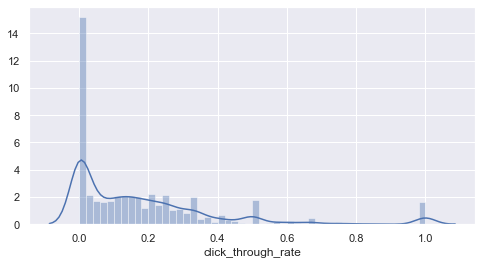

In [30]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
ax = sns.distplot(df['click_through_rate'].dropna())
plt.show()

##### Converting object type columns using LabelEncoder for correlation Matrix

In [31]:
df1=df.copy()
categoricalColumns=df.select_dtypes(include=[np.object]).columns
le=LabelEncoder()
for column in categoricalColumns:
    df1[column]=le.fit_transform(df1[column])

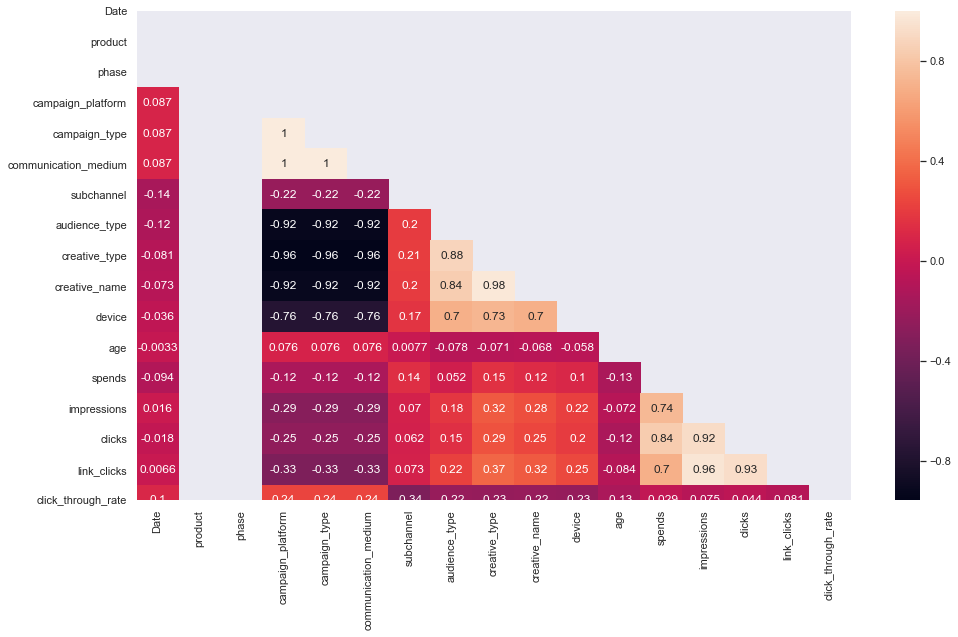

In [32]:
plt.figure(figsize=(16,9))
corr_matrix=df1.corr()
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True,mask=matrix)
plt.show()

##### Dropping unnecessary columns

In [33]:
df=df.drop(['product','phase','Date','clicks','link_clicks','impressions'],axis=1)
#drop column with correlation of 1
df=df.drop(['campaign_type','communication_medium'],axis=1)


###### One Hot Encoding

In [34]:
df=pd.get_dummies(df)
df.head()

,spends,click_through_rate,campaign_platform_Facebook Ads,campaign_platform_Google Ads,subchannel_Brand,subchannel_Competitor,subchannel_Facebook Ads,subchannel_Generic,audience_type_'-,audience_type_Audience 1,...,device_Mobile,device_Tablet,device_device,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or more,age_Undetermined
0,0.00,0.0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.00,0.0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.00,0.0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,14.63,0.6,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,53.31,0.2,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Creating a Regression model for click through rate

In [35]:
features = df.drop(['click_through_rate'], axis=1)
label = df['click_through_rate']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=0)
print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(12603, 29) Output label(12603,)
Dimensions of datasets that will be used for testing : Input features(4201, 29) Output label(4201,)


##### Function for calculating Mean squared error and R2 score

In [37]:
def model_metrics(model,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error of {} : {:0.2f} ".format(model,mse) )
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

##### Applying Different Regression models


In [38]:
from sklearn.linear_model import LinearRegression
slregressor = LinearRegression()
slregressor.fit(X_train,y_train)
y_pred_slr= slregressor.predict(X_test)
slrMetrics = model_metrics("Linear Regression",y_test,y_pred_slr)

Mean squared error of Linear Regression : 0.04 
R2 score: 0.19


In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state=0)
dtr_model.fit(X_train,y_train)
y_pred_dtr = dtr_model.predict(X_test)
dtrMetrics = model_metrics("Decision Tree",y_test,y_pred_dtr)

Mean squared error of Decision Tree : 0.04 
R2 score: 0.20


In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100, max_depth=15,random_state=0)
rfr_model.fit(X_train,y_train)
y_pred_rfr = rfr_model.predict(X_test)
rfrMetrics = model_metrics("RandomForest",y_test,y_pred_rfr)

Mean squared error of RandomForest : 0.02 
R2 score: 0.53
